In [108]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

import os

In [188]:
meta = pd.read_csv('../results/gene_perturb.csv', sep=',', header=0, index_col=0)
meta.index = meta.index.astype(str)

In [189]:
fnames = os.listdir('../results/gene/')
fnames = [x[:-4] for x in fnames]
fnames = list(set(fnames) & set(meta.index))

In [190]:
meta = meta.loc[fnames]

In [213]:
results = {}
for file_id in fnames:
    data = pd.read_csv('../results/gene/%s.csv' % (file_id), sep=',', header=0, index_col=0)
    data.index = pd.Series(data.index).str.upper().values
    data = data['t']
    results[file_id] = data

In [244]:
all_genes = []
for file_id in fnames:
    all_genes += list(results[file_id].index)
all_genes = list(set(all_genes))

In [245]:
resultsDF = pd.DataFrame(0.0, index = all_genes, columns=fnames)
for file_id  in fnames:
    resultsDF.loc[results[file_id].index, file_id] = results[file_id]

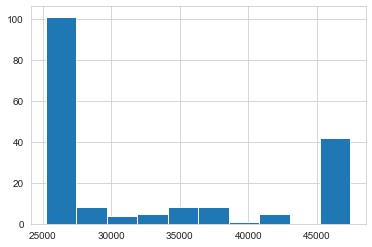

In [246]:
### nuber of zeros per experiments
(resultsDF == 0).sum().hist()

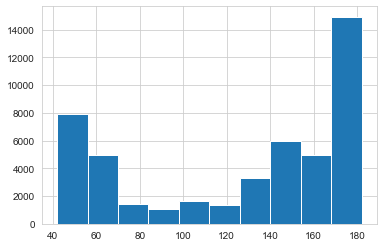

In [247]:
### nuber of zeros per genes
(resultsDF == 0).sum(1).hist()

In [248]:
### filter bad experiments (with a lot of NaN)
fil = (resultsDF == 0).sum(0) < 27500
good_experiments = resultsDF.columns[fil]
resultsDF = resultsDF[good_experiments]

In [249]:
### filter bad genes (with a lot of NaN)
fil = (resultsDF == 0).sum(1) == 0
resultsDF = resultsDF[fil]

In [250]:
### check overlap with lincs
lincs = pd.read_csv('/Users/benceszalai/Documents/Data/LINCS-L1000/GSE92742/GSE92742_Broad_LINCS_gene_info.txt',
                   sep='\t', header=0, index_col=0)
lincs = lincs[lincs['pr_is_lm']==1]

In [251]:
len(set(lincs['pr_gene_symbol']) & set(resultsDF.index))

735

In [252]:
resultsDF.shape

(11101, 101)

In [254]:
resultsDF.to_csv('../results/gene_perurb_results.csv', sep=',')

### Drug perturb

In [255]:
meta = pd.read_csv('../results/drug_perturb.csv', sep=',', header=0, index_col=0)

In [257]:
meta[meta['sign']!=0]

,cell_type,ctrl_ids,curator,drug_name,drugbank_id,geo_id,organism,pert_ids,platform,pubchem_cid,smiles,version,Target,Target_type,sign
105,liver,GSM1273512|GSM1273513|GSM1273514|GSM1273515,MicrotaskManic,Ethanol,DB00898,GSE52644,mouse,GSM1273500|GSM1273501|GSM1273502|GSM1273503,GPL1261,702.0,CCO,1.0,GABRA,agonist,1
106,liver,GSM1273512|GSM1273513|GSM1273514|GSM1273515,MicrotaskManic,Ethanol,DB00898,GSE52644,mouse,GSM1273500|GSM1273501|GSM1273502|GSM1273503,GPL1261,702.0,CCO,1.0,GRIN3A,antagonist,-1
107,liver,GSM1273512|GSM1273513|GSM1273514|GSM1273515,MicrotaskManic,Ethanol,DB00898,GSE52644,mouse,GSM1273500|GSM1273501|GSM1273502|GSM1273503,GPL1261,702.0,CCO,1.0,GLRA1,agonist,1
108,liver,GSM1273512|GSM1273513|GSM1273514|GSM1273515,MicrotaskManic,Ethanol,DB00898,GSE52644,mouse,GSM1273500|GSM1273501|GSM1273502|GSM1273503,GPL1261,702.0,CCO,1.0,GLRA2,agonist,1
153,NaN,GSM74493|GSM74494|GSM74495,Axel,Ethanol,DB00898,GSE3311,rat,GSM74496|GSM74497|GSM74498,GPL341,702.0,CCO,1.0,GABRA,agonist,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962,liver tissue,GSM159830|GSM159833|GSM159834|GSM159835,mmluxy,Sunitinib,DB01268,GSE6929,rat,GSM159831|GSM159832|GSM159837|GSM159838,GPL1355,5329102.0,CCN(CC)CCNC(=O)C1=C(NC(=C1C)C=C2C3=C(C=CC(=C3)...,1.0,PDGFRA,antagonist,-1
1964,DRG neurons - 10 &Acirc;&micro;M for 30 min,GSM1442972|GSM1442973|GSM1442974|GSM1442975,cadimo,Capsaicin,NaN,GSE59727,rat,GSM1442976|GSM1442977|GSM1442978|GSM1442979,GPL6101,1548943.0,CC(C)C=CCCCCC(=O)NCC1=CC(=C(C=C1)O)OC,1.0,TRPV1,agonist,1
1966,T47D breast cancer cells,GSM1649569|GSM1649573|GSM1649577,cadimo,Promegestone,NaN,GSE67561,human,GSM1649570|GSM1649574|GSM1649578,GPL10558,36709.0,CCC(=O)C1(CCC2C1(CCC3=C4CCC(=O)C=C4CCC23)C)C,1.0,PGR,agonist,1
1967,Skeletal muscles (of HIV-infected males),GSM113921|GSM115323|GSM115325|GSM115326|GSM115...,cadimo,Testosterone,DB00624,GSE5106,human,GSM115332|GSM115333|GSM115334|GSM115335|GSM115...,GPL571,6013.0,CC12CCC3C(C1CCC2O)CCC4=CC(=O)CCC34C,1.0,AR,agonist,1
